___
<a href='http://www.kgptalkie.com'><img src='kgptalkie_strips.png'/></a>
___

<center><em>Copyright by KGPTalkie</em></center>
<center><em>For free ML tutorials, visit us at <a href='http://www.kgptalkie.com'>www.kgptalkie.com</a></em></center>

## Unsupervised Learning
- Unsuperised learning is a type of machine learning where the model is trained on unlabeled data.
- The goal of unsupervised learning is to find patterns in the data.
- Unsupervised learning is used to find patterns in data that are not labeled.

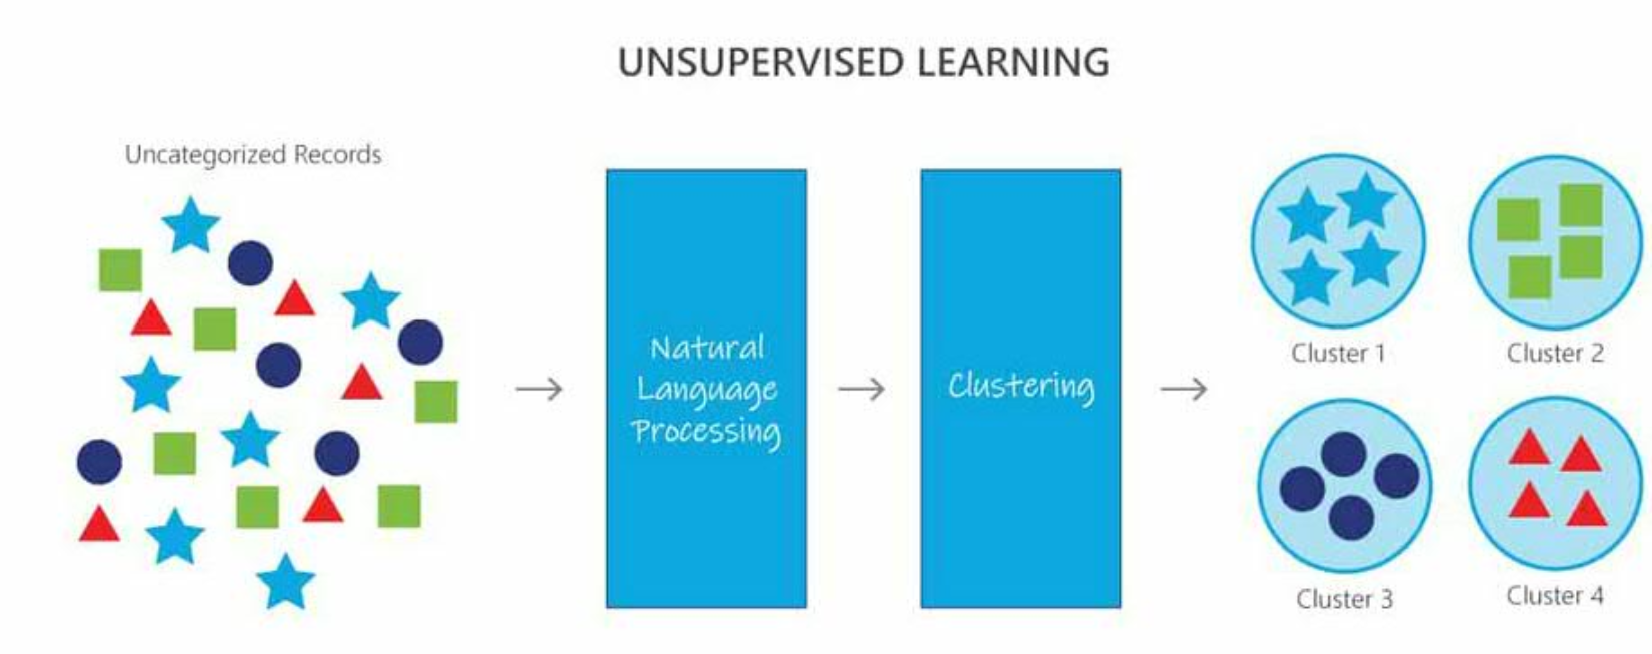


#### Types of Unsupervised Learning
- Clustering
    - K-Means Clustering
    - Hierarchical Clustering
    - Density-Based Clustering
    - Gaussian Mixture Models
    - Spectral Clustering
    
- Dimensionality Reduction
    - Principal Component Analysis
    - Linear Discriminant Analysis

## K Means Clustering for Customer Data

![clustering image](https://static.javatpoint.com/tutorial/machine-learning/images/k-means-clustering-algorithm-in-machine-learning.png)

- K-Means Clustering is an unsupervised learning algorithm that is used when you have unlabeled data (i.e., data without defined categories or groups).
- The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K.
- The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided.
- Data points are clustered based on feature similarity.
- The results of the K-Means Clustering algorithm are:
    - The centroids of the K clusters, which can be used to label new data
    - Labels for the training data (each data point is assigned to a single cluster)

### Working of K-Means Clustering Algorithm
- Choose the number of clusters K.
- Select at random K points, the centroids (not necessarily from your dataset).
- Assign each data point to the closest centroid -> that forms K clusters.
- Compute and place the new centroid of each cluster.
- Reassign each data point to the new closest centroid. If any reassignment took place, go to step 4, otherwise go to FINISH.




### How to choose the value of K?
- The Elbow Method
- The Silhouette Method

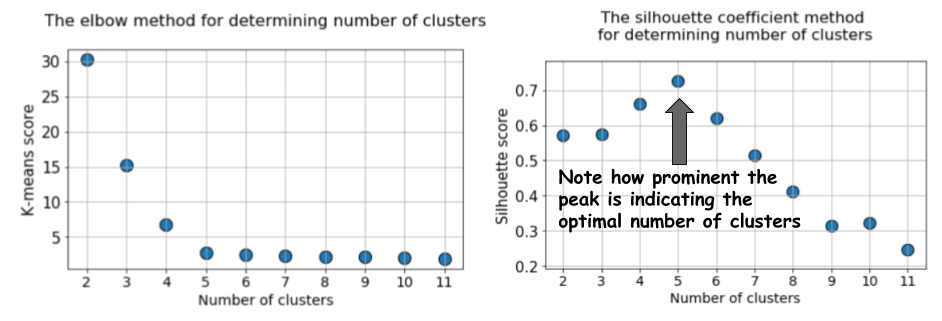

### The Elbow Method
- The Elbow Method allows you to visually pick the best value for K.
- The idea is to run K-Means clustering for a range of values of K (say 1-10), and for each value of K, calculate the sum of squared errors (SSE).
- The SSE is the sum of the squared distance between each member of the cluster and its centroid.
- The Elbow Method plots the SSE for each K.
- The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.

<img src='https://miro.medium.com/max/1400/1*b2sO2f--yfZiJazc5rYSpg.gif'>

### The Silhouette Method
- The Silhouette Method is used to determine the optimal number of clusters.
- The Silhouette Method plots the silhouette coefficient for each K.
- The silhouette coefficient is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
- The silhouette coefficient for a sample is (b - a) / max(a, b).
    - a is the mean distance between a sample and all other points in the same class.
    - b is the mean distance between a sample and all other points in the next nearest cluster.


### K-Means Clustering with Scikit-Learn
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

- The scikit-learn library contains the KMeans class, which can be used to perform K-Means Clustering.
- The KMeans class has many parameters that can be used to define the algorithm, but the most important are:
    - init: Initialization method of the centroids.
        - k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
        - random: choose k observations (rows) at random from data for the initial centroids.
        - ndarray: interpret the ndarray as a matrix of initial centroids.
    - n_clusters: The number of clusters to form as well as the number of centroids to generate.
    - n_init: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
    - max_iter: Maximum number of iterations of the k-means algorithm for a single run.

### Clustering Application
- Customer Segmentation
    - Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics.
    - It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources.
    - For example, one group might contain customers who are high-profit and low-risk, that is, more likely to purchase products, or subscribe for a service.

<!-- add new line break -->
- Social Network Analysis
    - Social network analysis is the process of investigating social structures through the use of networks and graph theory.
    - It characterizes networked structures in terms of nodes (individual actors, people, or things within the network) and the ties, edges, or links (relationships or interactions) that connect them.
    - It is used to study relationships between people, groups, organizations, or even entire societies.
<!--  -->
- Astronomical Data Analysis
    - Astronomical data analysis is the process of extracting information from astronomical data.
    - Astronomical data analysis is a subfield of astronomy and statistics.
    - It is used to study the universe and its contents.
<!--  -->
- Image Segmentation
    - Image segmentation is the process of partitioning a digital image into multiple segments (sets of pixels, also known as image objects).
    - The goal of segmentation is to simplify and/or change the representation of an image into something that is more meaningful and easier to analyze.
    - Image segmentation is typically used to locate objects and boundaries (lines, curves, etc.) in images.
<!--  -->
- Anomaly Detection
    - Anomaly detection is the process of identifying unexpected items or events in data sets, which differ from the norm.
    - Anomaly detection is also known as outlier analysis.
    - It is a technique used for identifying rare items, events or observations which raise suspicions by differing significantly from the majority of the data.
<!--  -->
- Data Labeling
    - Data labeling is the process of manually labeling datasets to train machine learning models.
    - Data labeling is a time-consuming process, and it is often the bottleneck in the machine learning pipeline.
    - Data labeling is also known as data annotation.
    - It is used to train machine learning models.



## About the dataset
This input file contains the basic information (ID, age, gender, income, spending score) about the customers of a mall. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.


## K Means Clustering for Customer Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('data/mall_customer.csv')
df.head()
df.tail()
df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
98,99,Male,48,61,42
186,187,Female,54,101,24
73,74,Female,60,50,56
173,174,Male,36,87,92
55,56,Male,47,43,41


In [18]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [19]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [20]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Data Visualization

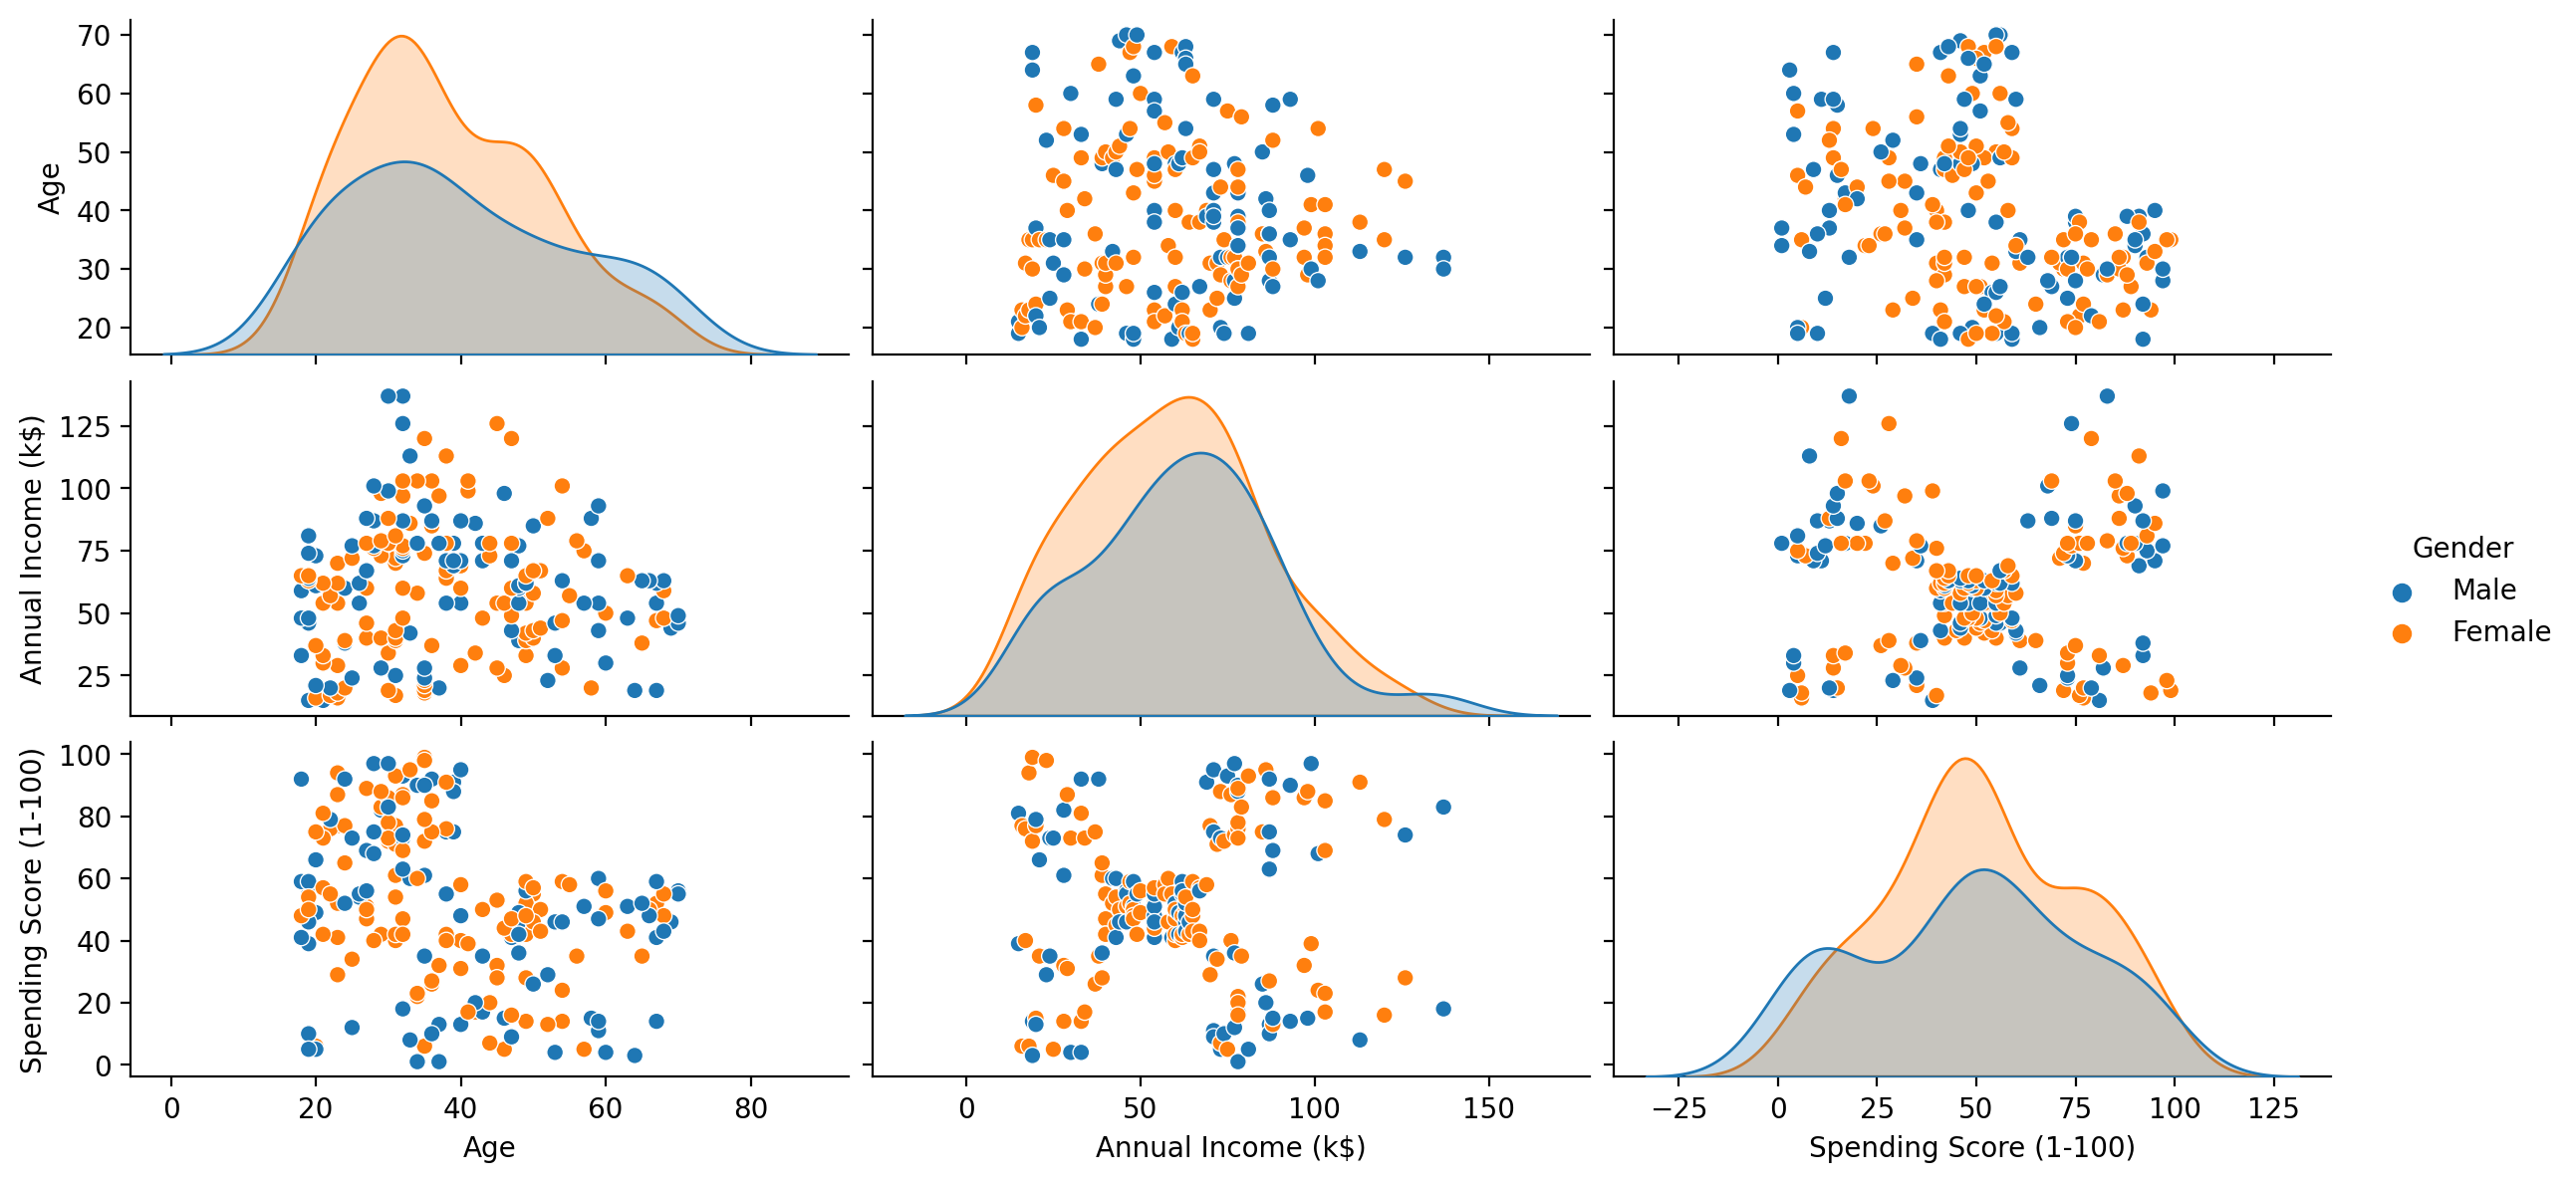

In [28]:
plt.rcParams['figure.figsize'] = (8,4)
plt.rcParams['figure.dpi'] = 200

sns.pairplot(df.iloc[:,1:], height=2, aspect=2, hue='Gender')

<AxesSubplot:xlabel='Gender', ylabel='count'>

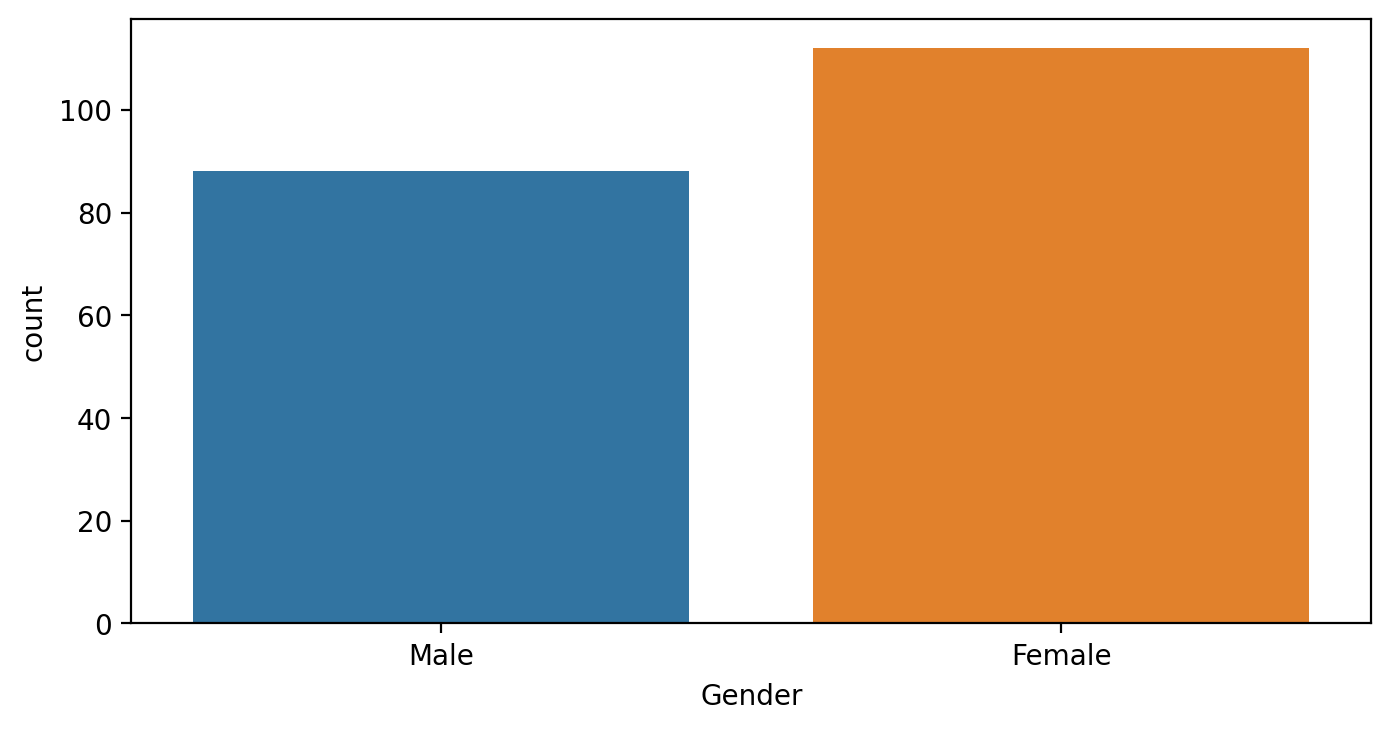

In [30]:
sns.countplot(x = df['Gender'])

### K-Means Clustering with Scikit-Learn
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [31]:
from sklearn.preprocessing import StandardScaler

In [40]:
X = df.iloc[:, 2:]
scaler = StandardScaler()
X = scaler.fit_transform(X)

gender = df['Gender']
df = pd.DataFrame(X, columns=['age', 'income', 'score'])
df['Gender'] = gender

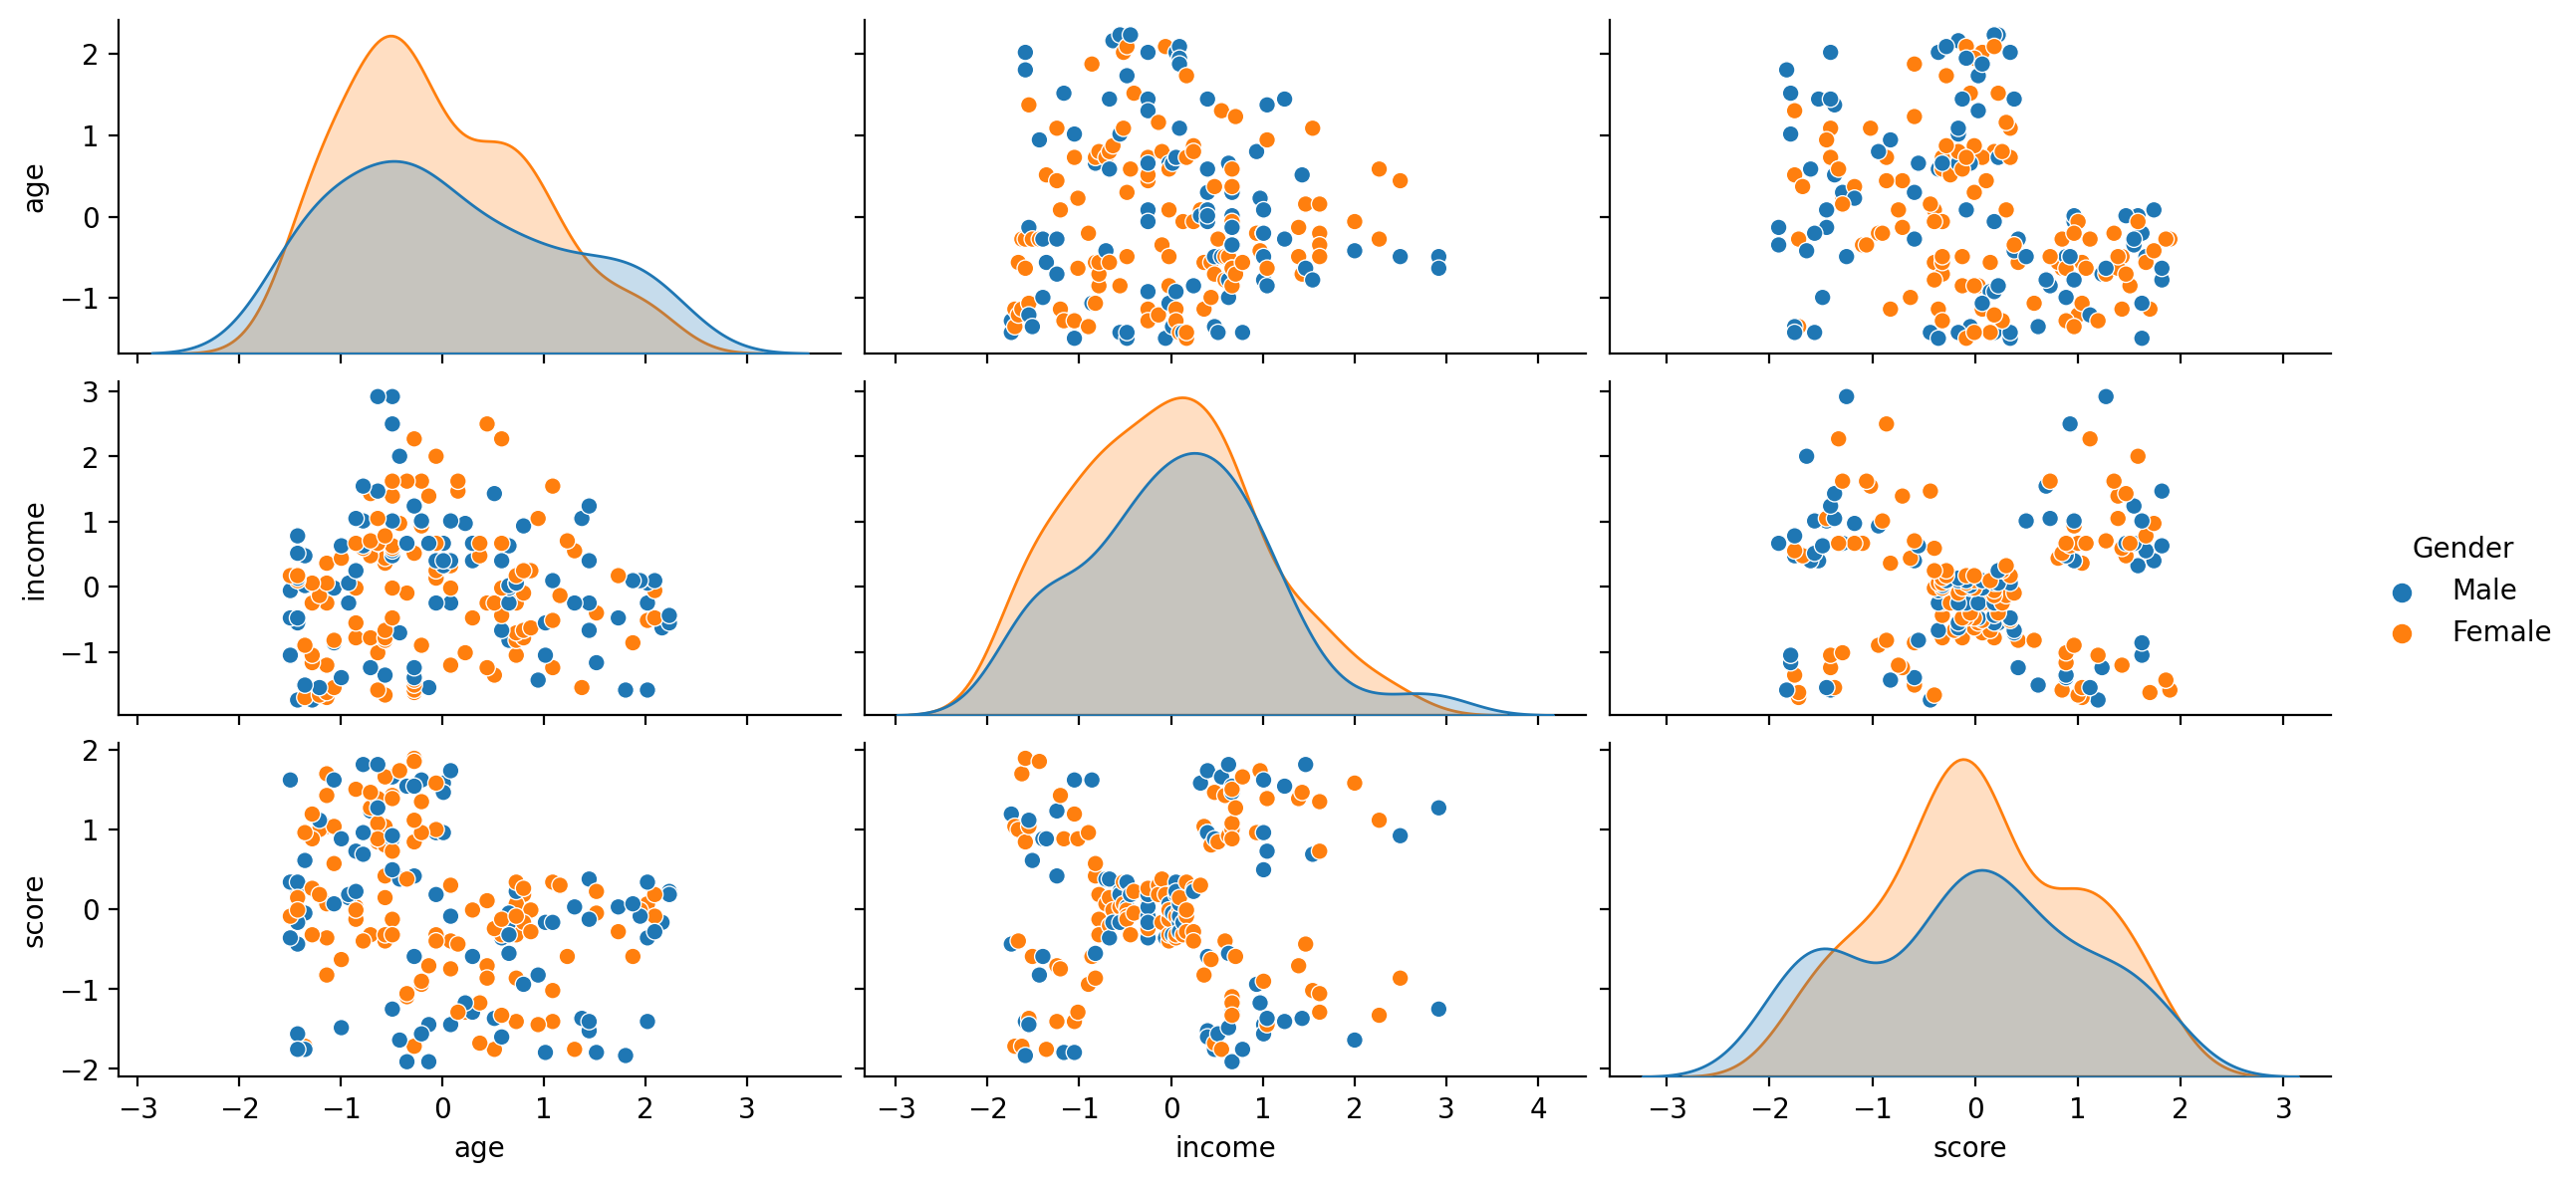

In [43]:
sns.pairplot(df, hue='Gender', height=2, aspect=2)

#### Segmentation with Age vs Spending Score

<AxesSubplot:xlabel='age', ylabel='score'>

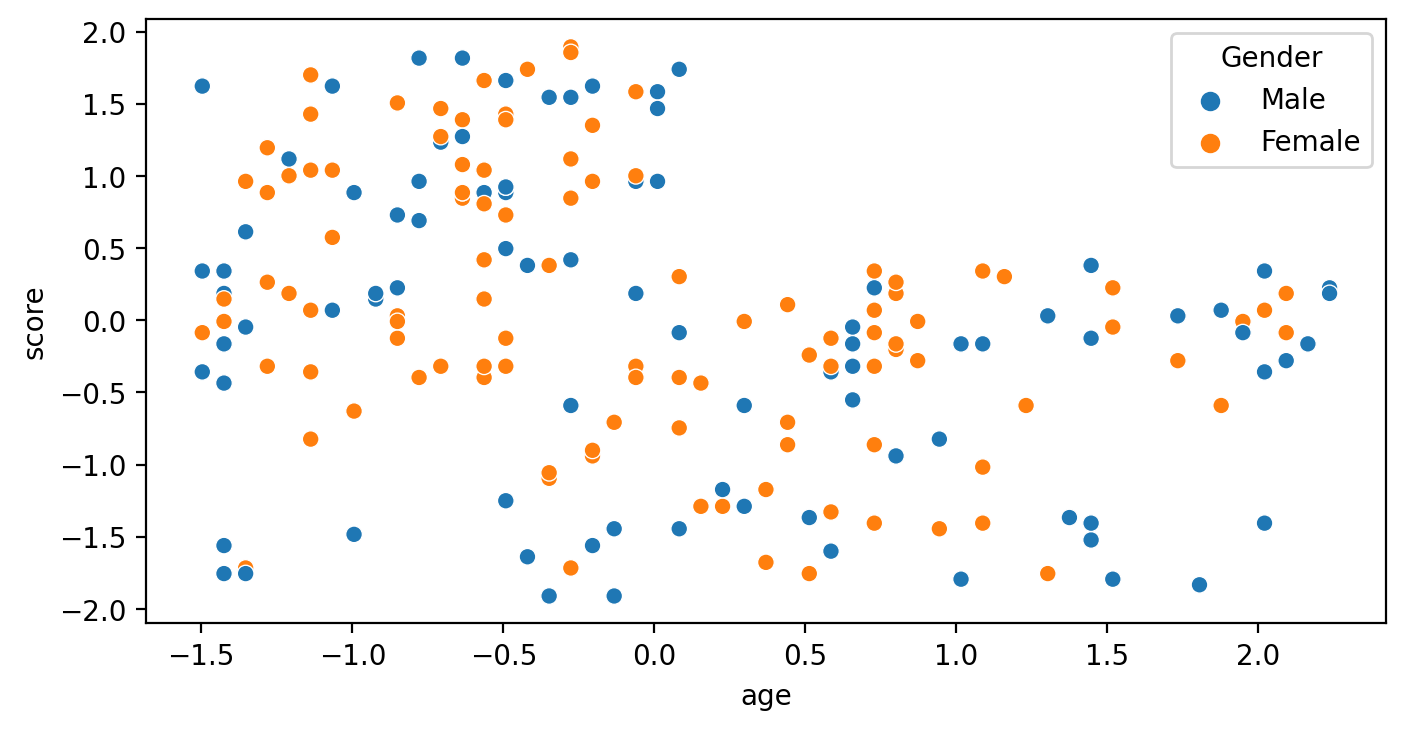

In [46]:
sns.scatterplot(data=df, x='age', y='score', hue='Gender')

In [47]:
columns = list(df.columns)
columns

['age', 'income', 'score', 'Gender']

In [51]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)


X = df[['age', 'score']].to_numpy()
kmeans.fit(X)

KMeans(n_clusters=2, random_state=42)

In [54]:
labels = kmeans.labels_

kmeans.cluster_centers_

kmeans.inertia_

189.3874903399244

#### Clusters Visualization

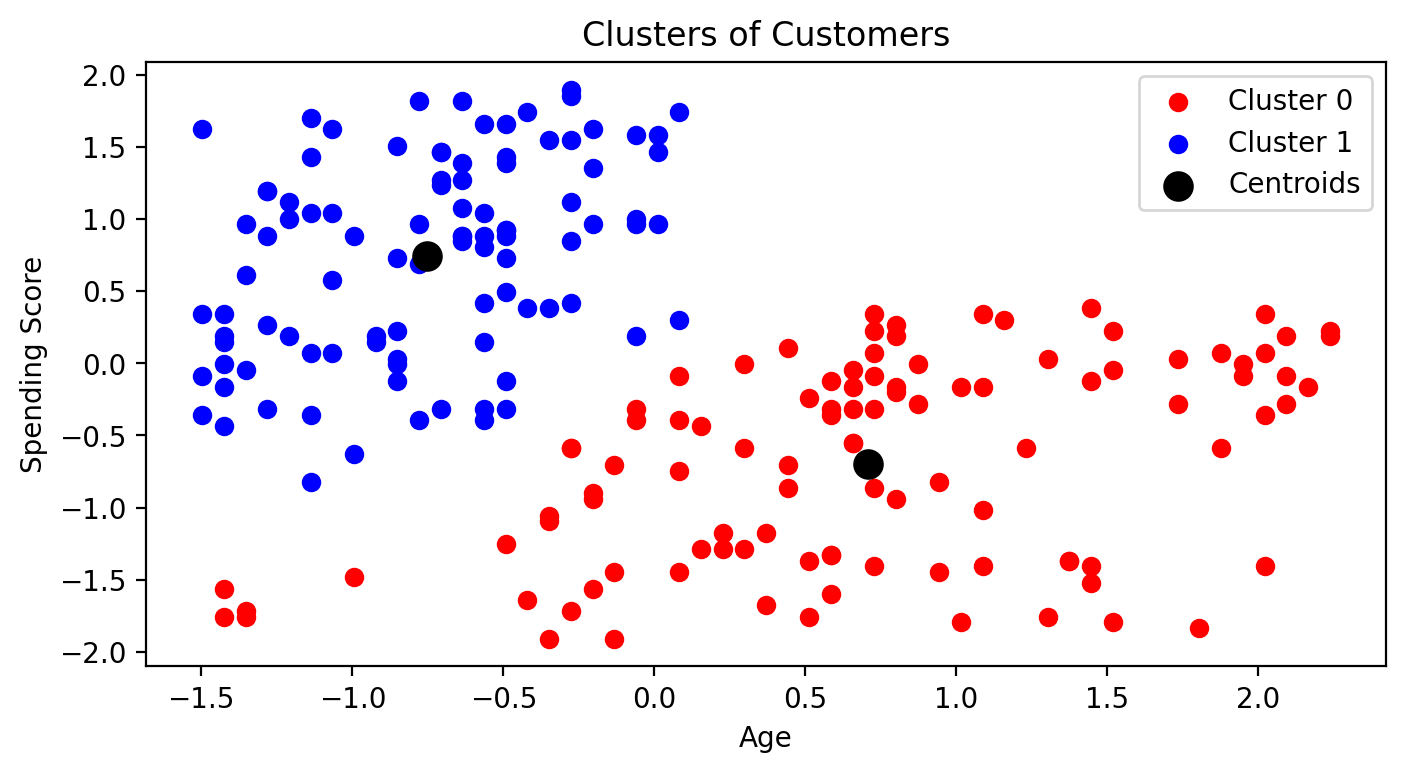

In [69]:
clust0 = labels==0
clust1 = labels==1

plt.scatter(X[clust0, 0], X[clust0, 1], c='red', label='Cluster 0')
plt.scatter(X[clust1, 0], X[clust1, 1], c='blue', label='Cluster 1')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           s=100, c='black', label='Centroids')

plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

#### Decision Boundary Visualization

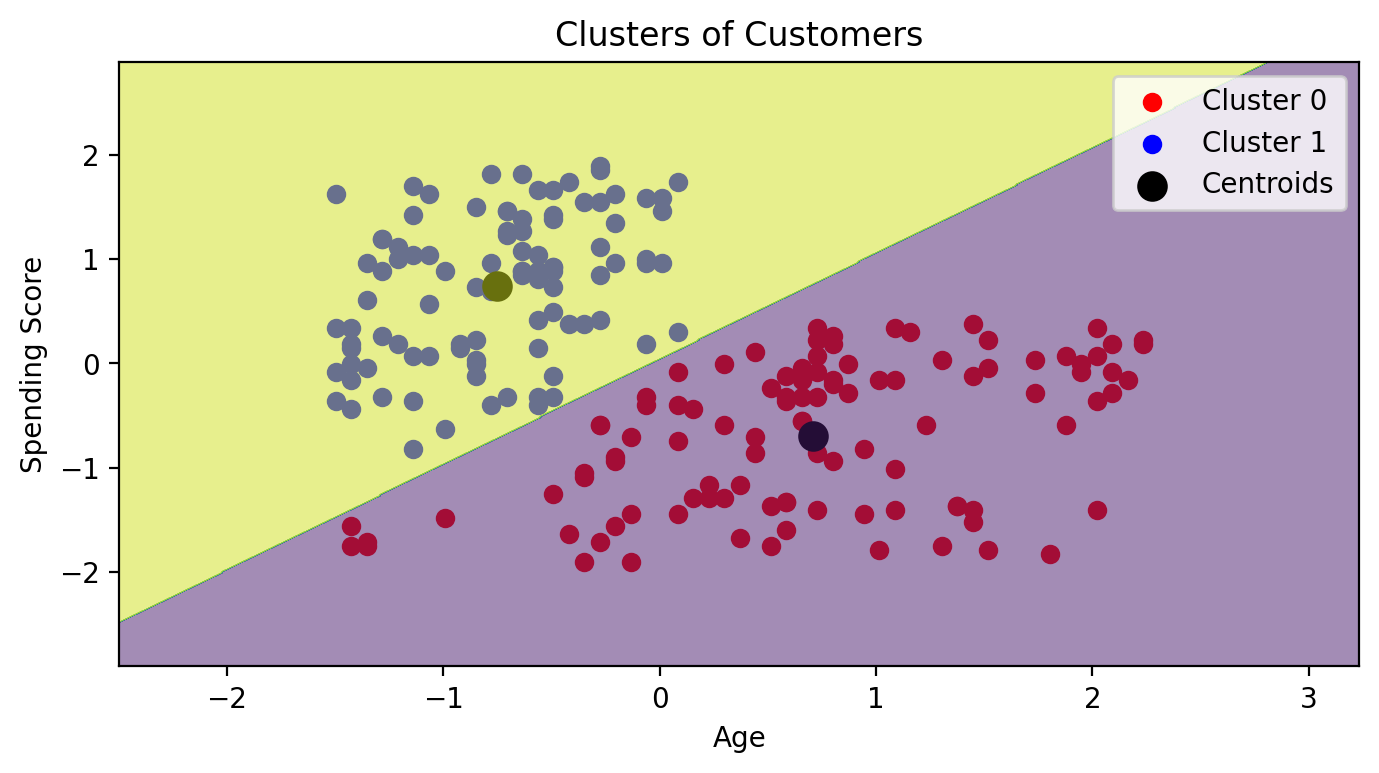

In [83]:
clust0 = labels==0
clust1 = labels==1

plt.scatter(X[clust0, 0], X[clust0, 1], c='red', label='Cluster 0')
plt.scatter(X[clust1, 0], X[clust1, 1], c='blue', label='Cluster 1')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           s=100, c='black', label='Centroids')

plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()

x_min = X[:, 0].min()-1
x_max = X[:, 0].max()+1

y_min = X[:, 1].min()-1
y_max = X[:, 1].max()+1



xx,yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

region_points = np.concatenate((xx.ravel().reshape(-1, 1),
                                yy.ravel().reshape(-1, 1)), axis=1)

Z = kmeans.predict(region_points)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.5)

#### Putting Everything Together

Cluster 0: 37 Customers
Cluster 1: 38 Customers
Cluster 2: 25 Customers
Cluster 3: 57 Customers
Cluster 4: 20 Customers
Cluster 5: 23 Customers


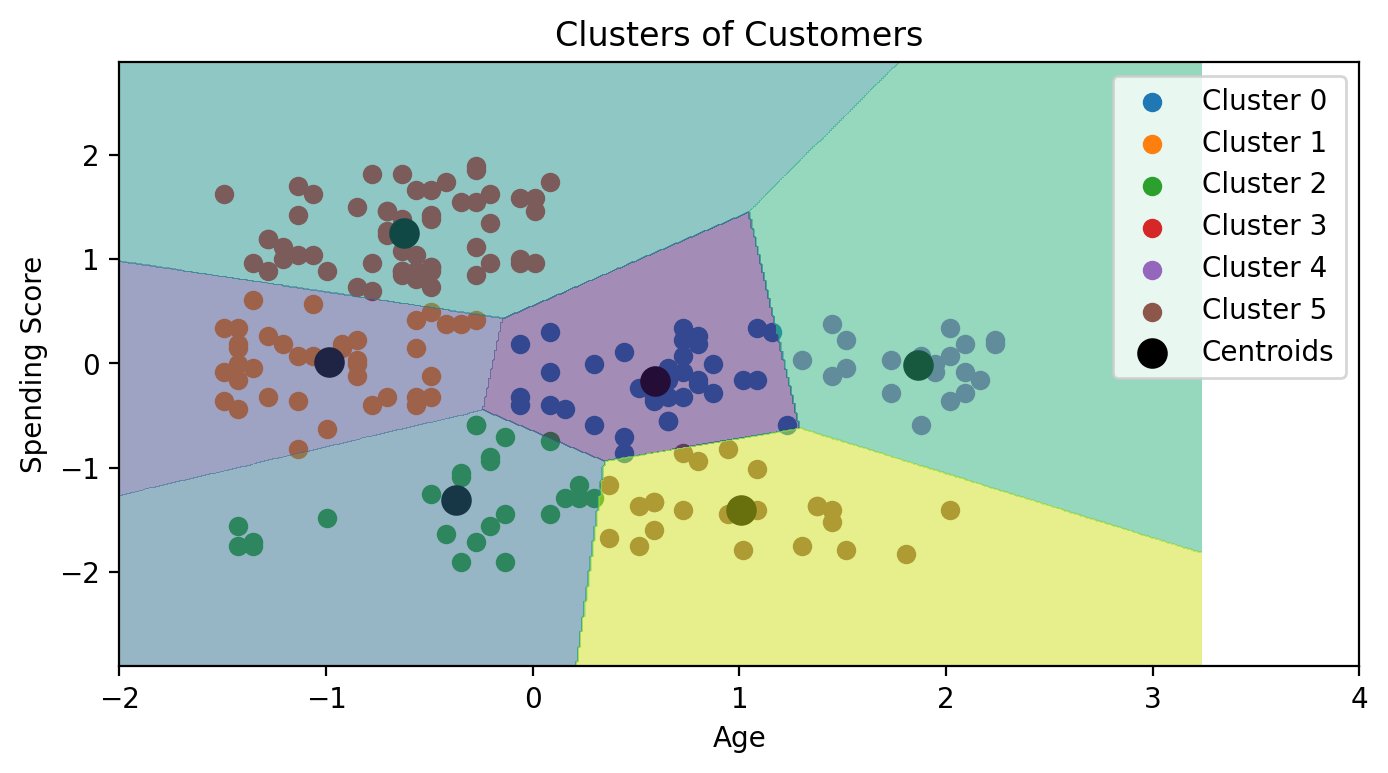

In [113]:
k=6
kmeans = KMeans(n_clusters=k)

X = df[['age', 'score']].to_numpy()
kmeans.fit(X)

labels = kmeans.labels_
kmeans.cluster_centers_
kmeans.inertia_

for idx in range(k):
    clust_i = labels==idx
    print("Cluster {}: {} Customers".format(idx, sum(clust_i)))

    plt.scatter(X[clust_i, 0], X[clust_i, 1], label='Cluster {}'.format(idx))
    
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           s=100, c='black', label='Centroids')

plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()

plt.xlim(-2, 4)

## decision boundary
x_min = X[:, 0].min()-1
x_max = X[:, 0].max()+1

y_min = X[:, 1].min()-1
y_max = X[:, 1].max()+1


xx,yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

region_points = np.concatenate((xx.ravel().reshape(-1, 1),
                                yy.ravel().reshape(-1, 1)), axis=1)

Z = kmeans.predict(region_points)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.5)
plt.show()

#### How to Decide the Optimal Number of Clusters
- Elbow Method
- Silhouette Method

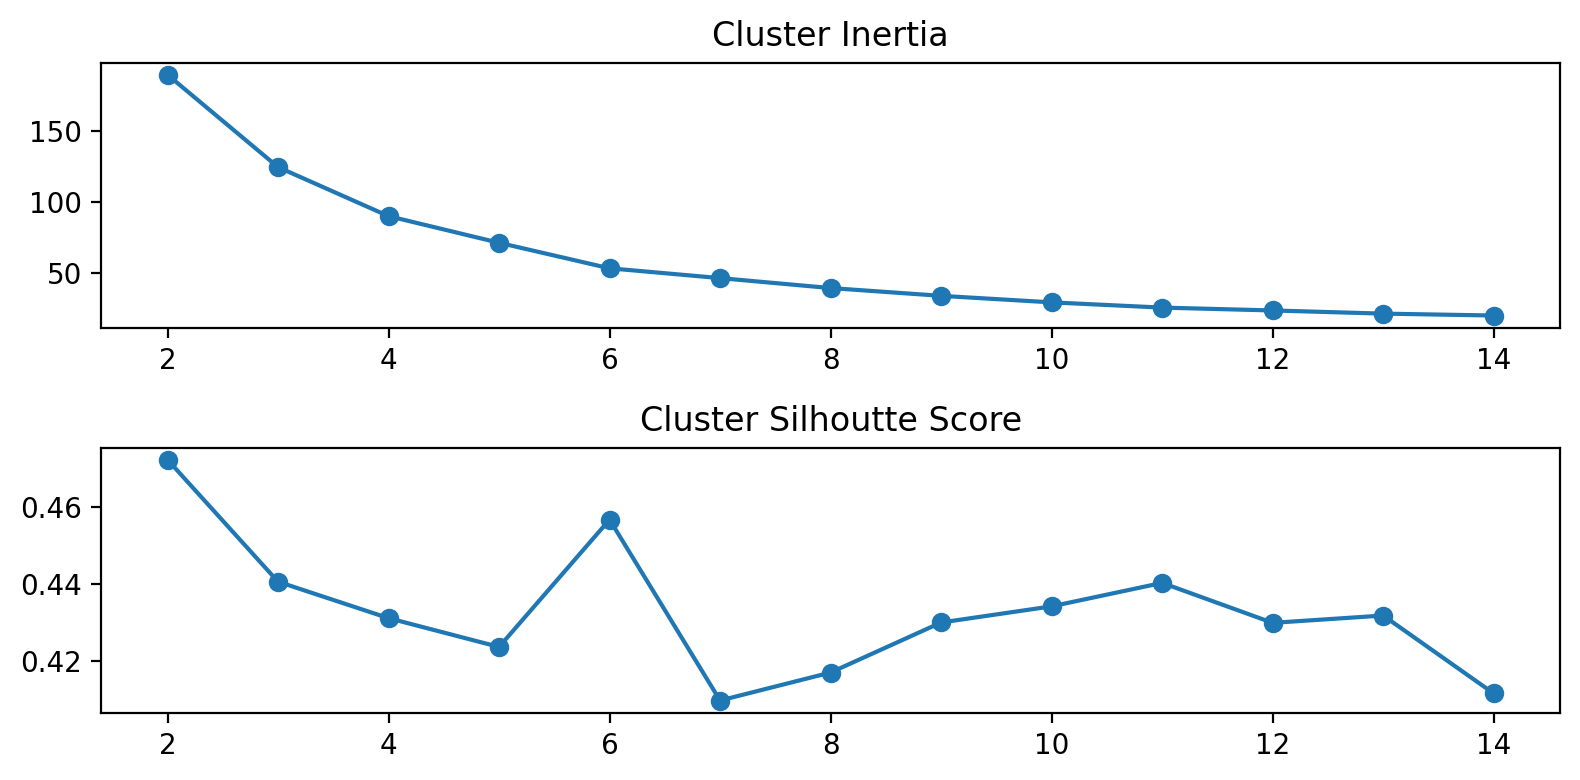

In [112]:
from sklearn.metrics import silhouette_score
inertia = []
sil_score = []

max_k=15
for k in range(2, max_k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    
    inertia.append(kmeans.inertia_)
    
    cluster_labels = kmeans.labels_
    s_score = silhouette_score(X, cluster_labels)
    sil_score.append(s_score)
    
plt.subplot(2,1, 1)
plt.plot(np.arange(2, max_k), inertia, 'o-')
plt.title('Cluster Inertia')

    
plt.subplot(2,1, 2)
plt.plot(np.arange(2, max_k), sil_score, 'o-')
plt.title('Cluster Silhoutte Score')
plt.tight_layout()

### Clustering for Annual Income vs Spending Score

Cluster 0: 22 Customers
Cluster 1: 35 Customers
Cluster 2: 81 Customers
Cluster 3: 39 Customers
Cluster 4: 23 Customers


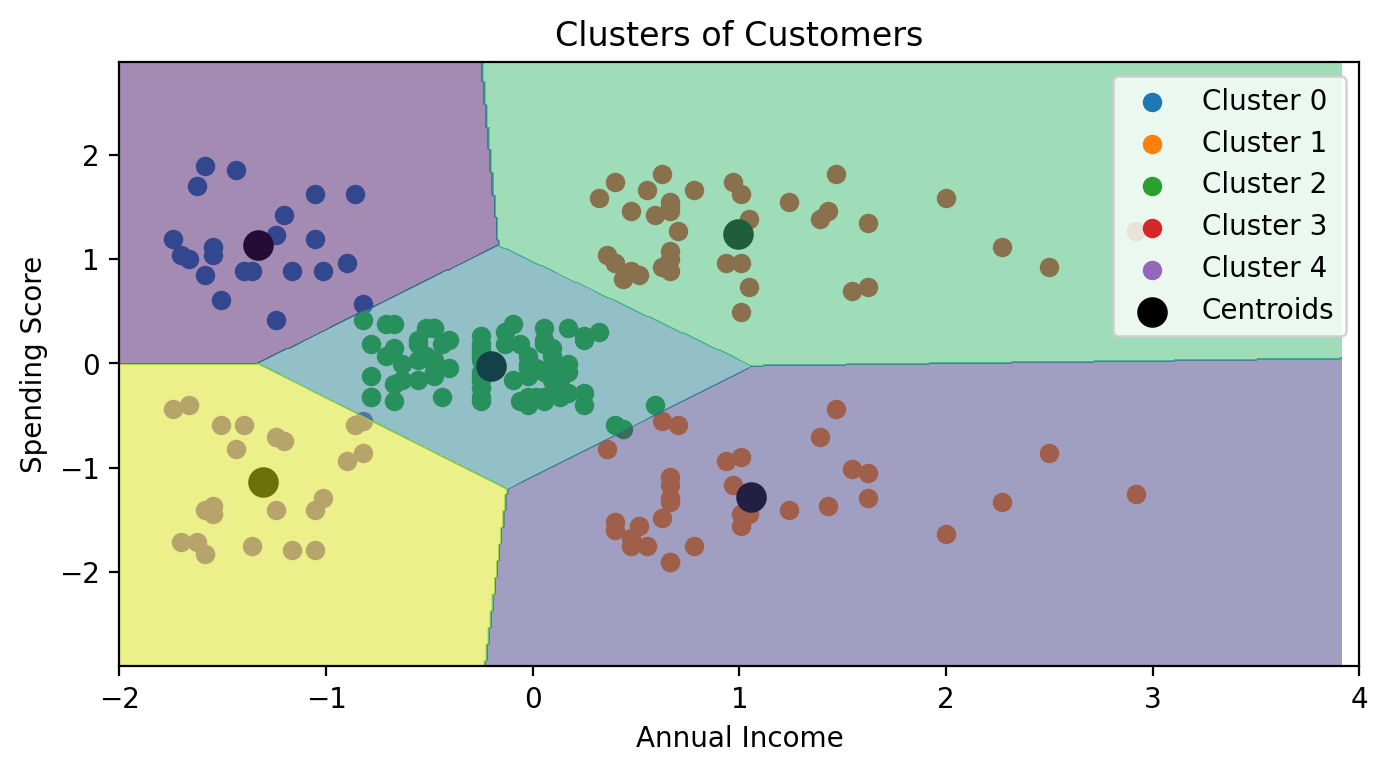

In [116]:
k=5
kmeans = KMeans(n_clusters=k)

X = df[['income', 'score']].to_numpy()
kmeans.fit(X)

labels = kmeans.labels_
kmeans.cluster_centers_
kmeans.inertia_

for idx in range(k):
    clust_i = labels==idx
    print("Cluster {}: {} Customers".format(idx, sum(clust_i)))

    plt.scatter(X[clust_i, 0], X[clust_i, 1], label='Cluster {}'.format(idx))
    
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           s=100, c='black', label='Centroids')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()

plt.xlim(-2, 4)

## decision boundary
x_min = X[:, 0].min()-1
x_max = X[:, 0].max()+1

y_min = X[:, 1].min()-1
y_max = X[:, 1].max()+1


xx,yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

region_points = np.concatenate((xx.ravel().reshape(-1, 1),
                                yy.ravel().reshape(-1, 1)), axis=1)

Z = kmeans.predict(region_points)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.5)
plt.show()

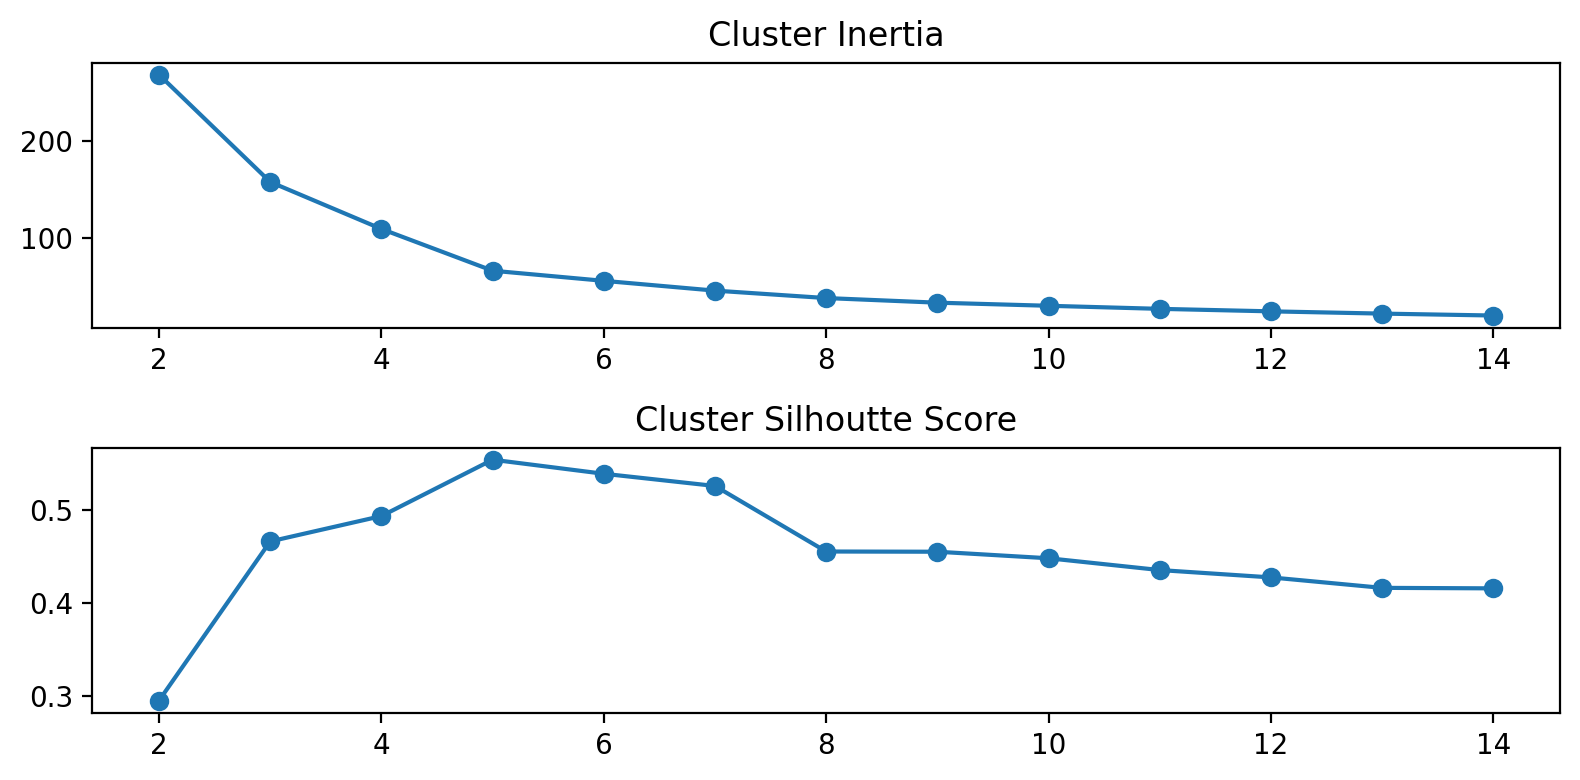

In [115]:
from sklearn.metrics import silhouette_score
inertia = []
sil_score = []

X = df[['income', 'score']].to_numpy()
max_k=15
for k in range(2, max_k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    
    inertia.append(kmeans.inertia_)
    
    cluster_labels = kmeans.labels_
    s_score = silhouette_score(X, cluster_labels)
    sil_score.append(s_score)
    
plt.subplot(2,1, 1)
plt.plot(np.arange(2, max_k), inertia, 'o-')
plt.title('Cluster Inertia')

    
plt.subplot(2,1, 2)
plt.plot(np.arange(2, max_k), sil_score, 'o-')
plt.title('Cluster Silhoutte Score')
plt.tight_layout()

### 3D Clustering Age , Annual Income and Spending Score

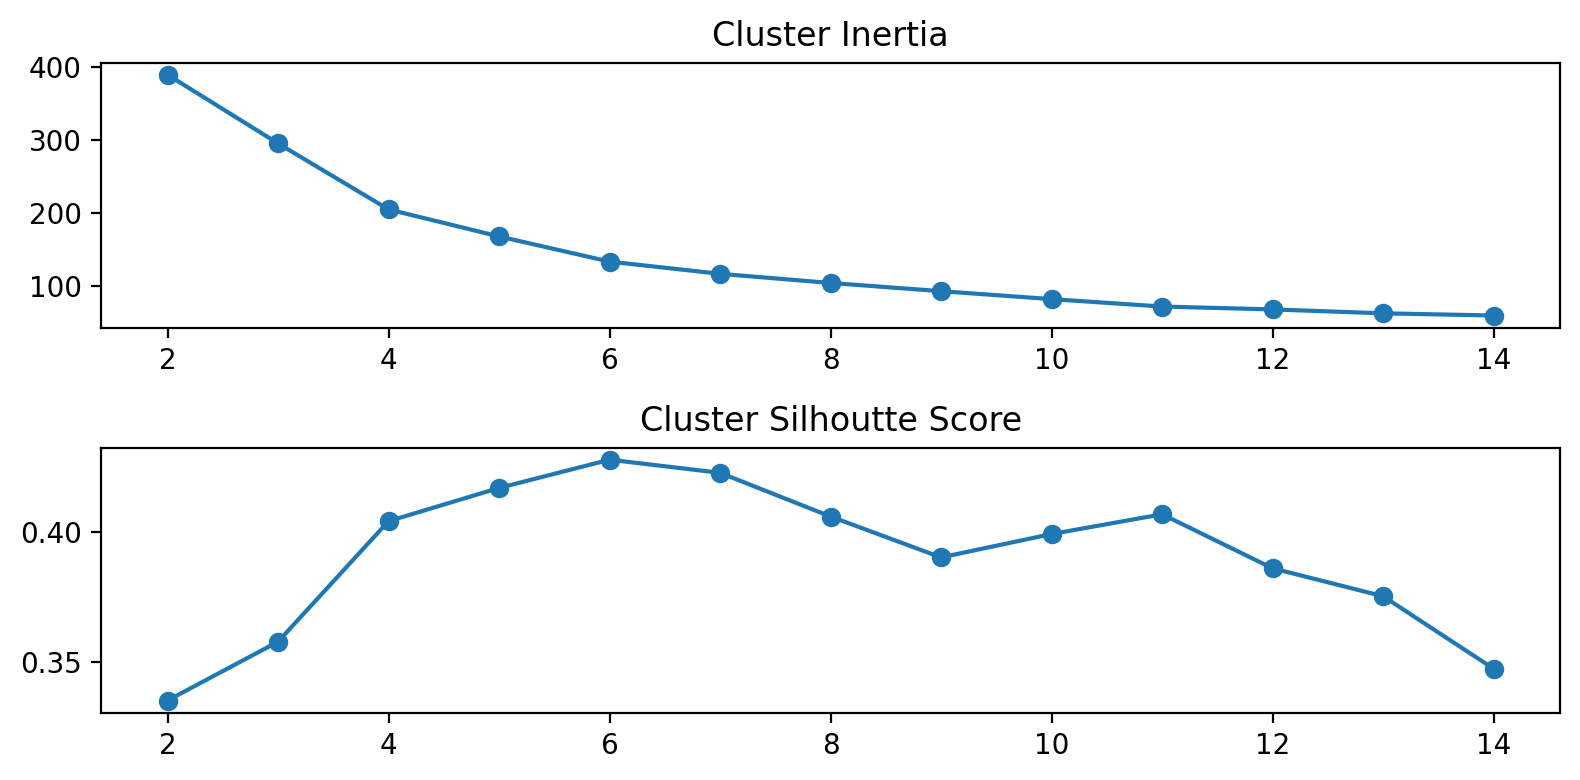

In [117]:
from sklearn.metrics import silhouette_score
inertia = []
sil_score = []

X = df[['age', 'income', 'score']].to_numpy()
max_k=15
for k in range(2, max_k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    
    inertia.append(kmeans.inertia_)
    
    cluster_labels = kmeans.labels_
    s_score = silhouette_score(X, cluster_labels)
    sil_score.append(s_score)
    
plt.subplot(2,1, 1)
plt.plot(np.arange(2, max_k), inertia, 'o-')
plt.title('Cluster Inertia')

    
plt.subplot(2,1, 2)
plt.plot(np.arange(2, max_k), sil_score, 'o-')
plt.title('Cluster Silhoutte Score')
plt.tight_layout()

In [119]:
k = 6
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
labels = kmeans.labels_

In [121]:
df['cluster'] = labels

In [126]:
import plotly as py
import plotly.graph_objects as go

trace = go.Scatter3d(
        x = df['age'], y = df['score'], z = df['income'],
        mode='markers',
        marker=dict(
                color = df['cluster'])
        )

data = [trace]
layout = go.Layout(
            title='3D Clustering',
            scene = dict(
                    xaxis=dict(title='Age'),
                    yaxis=dict(title='Score'),
                    zaxis=dict(title='Annual Income')))

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)


# Other Resources
|  ML Course | Description |
|:---|:---|
| [**Data Visualization in Python Masterclass™: Beginners to Pro**](https://bit.ly/udemy95off_kgptalkie) |  Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Python for Machine Learning: A Step-by-Step Guide**](https://bit.ly/ml-ds-project) | Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Python for Linear Regression in Machine Learning**](https://bit.ly/regression-python) | Learn to build Linear Regression models using Python and its libraries like Scikit-Learn. |
| [**Introduction to Spacy 3 for Natural Language Processing**](https://bit.ly/spacy-intro) | Learn to build Natural Language Processing models using Python and its libraries like Spacy. |
| [**Advanced Machine Learning and Deep Learning Projects**](https://bit.ly/kgptalkie_ml_projects) | Learn to build Advanced Machine Learning and Deep Learning models using Python and transformer models like BERT, GPT-2, and XLNet. |
| [**Natural Language Processing in Python for Beginners**](https://bit.ly/intro_nlp) | Learn to build Natural Language Processing Projects using Spacy, NLTK, and Gensim, and transformer models like BERT, GPT-2, and XLNet. |
| [**Deployment of Machine Learning Models in Production in Python**](https://bit.ly/bert_nlp) |  Learn to deploy Machine Learning and Deep Learning models using Python and its libraries like Flask, Streamlit, and NGINX. |
| [**R 4.0 Programming for Data Science - Beginners to Pro**](https://bit.ly/r4-ml) | Learn to build Machine Learning and Deep Learning models using R and its libraries like caret, tidyverse, and keras. |
